## Repurchase Intention
Liang, L. J. (2015). Understanding Repurchase Intention of Airbnb Consumers: Perceived Authenticity, EWoM and Price Sensitivity (Doctoral dissertation).

<img src="liang.png">

## Overview
- Cluster users
- Learn a regression model to predict $\hat p$
- Pass it to a function $S(p,\hat p)$
- Rank ???

## Clustering
### Mean Shift
Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.
### Affinity Propagation
based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, AP does not require the number of clusters to be determined or estimated before running the algorithm

## Features for clustering
### Expensiveness    
$ \log(\frac{Price}{\mu_{price}}) $

### Confortness
$ \log(\frac{Bedrooms+\frac{1}{2}(Beds + Bathrooms))}{Accommodates})$

### Context_kurtosis and Context_skewness
## Example clusters


In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

path="/home/raulsanchez/recsys_airbnb/"
world = pd.read_csv(path+'datasets/world_v1.5.csv', sep="\t", header=0, na_values="NaNxxxx", low_memory=False)
cities = pd.read_csv(path+'datasets/cities.csv', sep="\t", header=0, na_values="NaNxxxx", low_memory=False)
test_cases = pd.read_csv(path+'datasets/test_cases_v1.7.csv', sep="\t", header=0, na_values="NaNxxxx", low_memory=False)
test_cases.target_guest_history = test_cases.target_guest_history.apply(eval)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
features = ["number_of_reviews","expensiveness","confortness","context_kurtosis","context_skew"]

have_neightbors = test_cases[test_cases.valid_neighbor_users_length>0]
have_neightbors_and_airbnb_ranking = have_neightbors[have_neightbors.airbnb_ranking_length > 0]

users_centroid = pd.DataFrame(columns=features)
for index, test_case in have_neightbors_and_airbnb_ranking.iterrows():
    #test_case = have_neightbors_and_airbnb_ranking.iloc[0]
    test_case.target_guest_history
    user_centroid = world[world.id.isin(test_case.target_guest_history)][features].mean()
    user_centroid.name = test_case.test_case_id
    users_centroid = users_centroid.append(user_centroid)

users_centroid = users_centroid.dropna()
X = users_centroid.values
X = StandardScaler().fit_transform(X)

bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
affinity_propagation = cluster.AffinityPropagation(damping=.9,preference=-200)

In [4]:
for algorithm in [ms, affinity_propagation]:
    algorithm.fit(X)

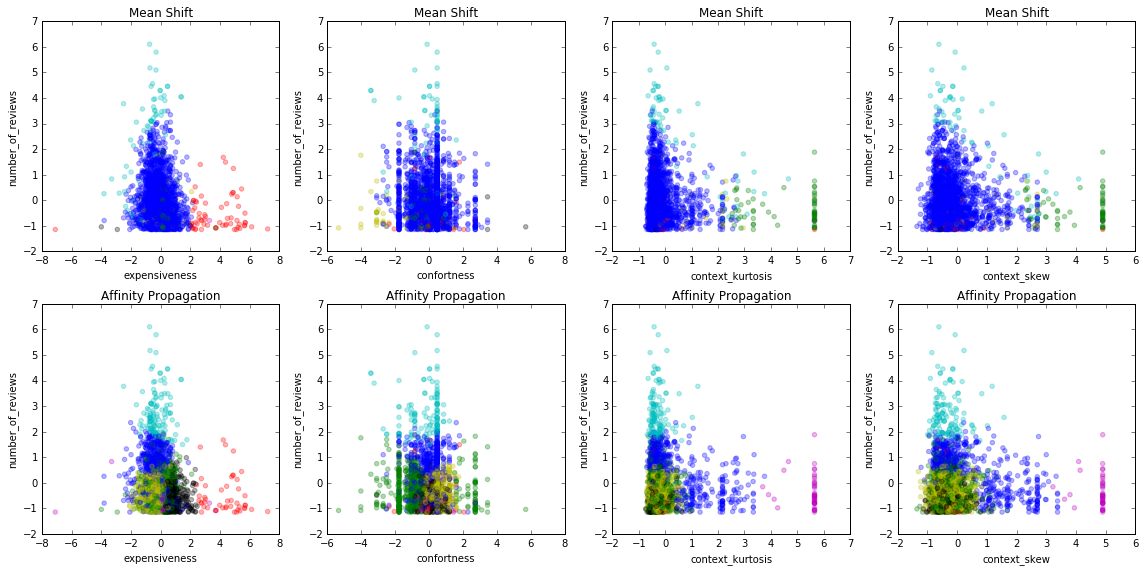

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(2,4)
i_plot = 0
labels = ["Mean Shift", "Affinity Propagation"]
for algorithm in [ms, affinity_propagation]:
    axs[i_plot,0].scatter(X[:,1], X[:,0],color=colors[algorithm.labels_], alpha=0.3)
    axs[i_plot,0].set_title(labels[i_plot])
    axs[i_plot,0].set_ylabel("number_of_reviews")
    axs[i_plot,0].set_xlabel("expensiveness")
    
    axs[i_plot,1].scatter(X[:,2], X[:,0],color=colors[algorithm.labels_], alpha=0.3)
    axs[i_plot,1].set_title(labels[i_plot])
    axs[i_plot,1].set_ylabel("number_of_reviews")
    axs[i_plot,1].set_xlabel("confortness")
    
    axs[i_plot,2].scatter(X[:,3], X[:,0],color=colors[algorithm.labels_], alpha=0.3)
    axs[i_plot,2].set_title(labels[i_plot])
    axs[i_plot,2].set_ylabel("number_of_reviews")
    axs[i_plot,2].set_xlabel("context_kurtosis")
    
    axs[i_plot,3].scatter(X[:,4], X[:,0],color=colors[algorithm.labels_], alpha=0.3)
    axs[i_plot,3].set_title(labels[i_plot])
    axs[i_plot,3].set_ylabel("number_of_reviews")
    axs[i_plot,3].set_xlabel("context_skew")
    i_plot+=1
fig.set_size_inches(16, 8)
fig.tight_layout()

## Regression model

$\hat p = \beta_0 +\beta_1 space_f+ \beta_2 categorical_f+ \beta_2 rating_f$

### context_f
- context_mean
- context_min
- context_max
- context_histogram
- context_number_of_rooms
- context_names
- context_prices
- context_ratings
- context_number_of_reviews
- context_room_type
- context_room_id
- context_host_id
- context_instant_booking
- context_super_hosts
- context_skew
- context_kurtosis
 
### categorical_f
- property_type
- room_type
- bed_type
 
### space_f
- accommodates
- bathrooms
- bedrooms
- beds
 
### price_f
- price
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee
- extra_people

### rating_f
- number_of_reviews
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value"]

### text_f
- name
- summary
- space
- description
- experiences_offered
- neighborhood_overview
- notes
- transit
 
### local_f
- city
- country
- latitude
- longitude
 
### no_used_f
- host_since
- host_location
- host_about
- host_is_superhost
- host_verifications
- cancellation_policy

## Rank

I'm thinking of how do we immitate Lian's Model...
